
     
<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" alt="Smiley face" height="210" width="210">

### ISRAEL CASTILLO HERRERA
### IF708348


In [2]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

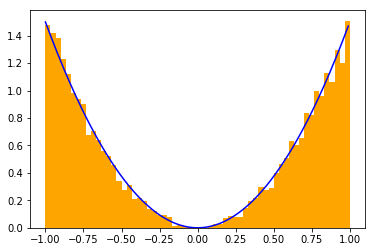

In [3]:
sqrt3=lambda x: x**(1/3) if x>=0 else -(-x)**(1/3)
xi = lambda u: sqrt3(2*u-1)
f = lambda x:3*np.power(x,2)/2 if -1<=x<=1 else 0
u1 = np.random.rand(10000)
rand1=list(map(xi,u1))

x = np.arange(-1,1,.01)
plt.plot(x,list(map(f,x)),label='f(x)', color= 'blue')
plt.hist(rand1,bins=60, density=True, color='orange')
plt.show()

### Montecarlo Crudo

In [4]:
print('La Media por Montecarlo Crudo es: ', np.mean(rand1))

La Media por Montecarlo Crudo es:  -0.0095009838805724


### Muestreo Estratificado

In [7]:
## Estratificado
np.random.seed(65485)
r1 = np.random.uniform(0,.6,3)
r2 = np.random.uniform(.6,.9,3)
r3 = np.random.uniform(.9,1,4)
r = [r1,r2,r3]

w1 = 3/6; w2 = 1; w3 = 4
w = [w1,w2,w3]

rand3 = list(map(lambda ui,wi: np.asarray(list(map(xi,ui)))/wi,r,w))
media_monte2 = np.concatenate(rand3).mean()
print('Media usando el método de estratificación =',media_monte2)

Media usando el método de estratificación = 0.34400338079972276


### Complementario

In [8]:
xi = lambda u: sqrt3(2*u-1)
u1 = np.random.rand(10000)
ucom = 1-u1
L2=list(map(xi,u1))
L22=list(map(xi,ucom))
mcompl=(np.mean(L2)+np.mean(L22))/2
print("Media por Numeros Complementarios:", mcompl)

Media por Numeros Complementarios: 0.0


In [11]:
## Estratificacion con B estratos
def strats(B):
    np.random.seed(65485)
    U2 =np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return v

n = [2,4,6,10]
#llamando la funcion estratificado para cada valor que tengo en n
x = list(map(strats,n))
#va primero a recibir el un arreglo entonces se necesita otro map para evaluar la funcion entre cada valor del arreglo
media = list(map(lambda ui: list(map(xi,ui)),x))
#sacar la media de cada arreglo que hay en monte_estra
media = list(map(lambda r: np.mean(r),media))
media

df = pd.DataFrame(index=n,columns=['Media'], dtype='float')
df.loc[n,"Media"] = media
df

,Media
2,0.208606
4,0.033345
6,-0.013768
10,-0.035733


> # Comentarios
> La distribución que estás utilizando para estimar la media no es la correcta, recuerda que la distribución a la cúal queremos estimar la media es 
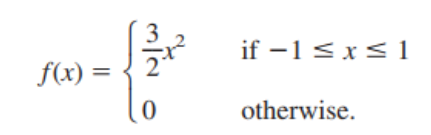
> El enunciado dice que debes de encontrar el valor teórico de la media de la distribución, y usar este valor para encontrar el error de cada aproximación de la media usando las técnicas requeridas. 

> También te recomiendo realizar una gráfica donde compares tu función `f(x)` con tu histograma de muestras aleatorios, en donde verifiques tu resultado, algo de esta manera
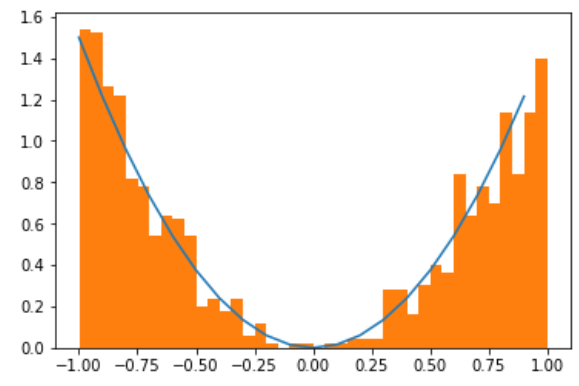
> Recuerda poner los enunciados de la tarea en cada solución que realices